<a href="https://colab.research.google.com/github/anmol1810rs/Loan_Prediction_Using_Classification_Techniques/blob/main/ML_With_Python_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-11-09 10:30:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.01s   

2020-11-09 10:30:39 (1.84 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [ ]:
df = pd.read_csv('loan_train.csv')
df.head(10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [ ]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df.head(10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


In [ ]:
!conda install -c anaconda seaborn -y

/bin/bash: conda: command not found


In [ ]:
df.head(20)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


In [ ]:
df['loan_status'].value_counts() #gives an idea of the types of values in the loan_status attribute/column

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

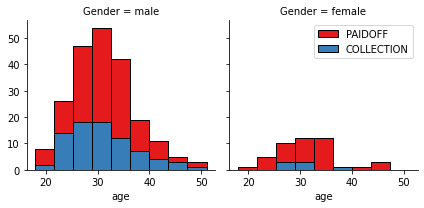

In [ ]:
import seaborn as sns
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col = "Gender",hue = "loan_status" , palette="Set1", col_wrap =2 )
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [ ]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

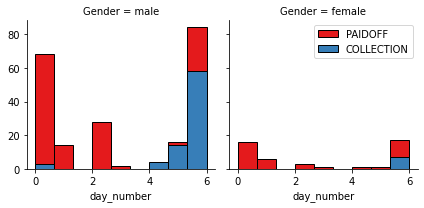

In [ ]:
df['day_number'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.day_number.min(), df.day_number.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'day_number', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [ ]:
df['weekend'] = df['day_number'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_number,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [ ]:
#convert male_female values to binary encoded values
df['Gender'].replace(to_replace = ['male', 'female'], value = [0,1], inplace=True)
df.head()


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_number,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [ ]:
#One hot encoding the education values
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [ ]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [ ]:
new_table= df[['Principal','terms','age', 'Gender','weekend']]
new_table = pd.concat([new_table,pd.get_dummies(df['education'])], axis=1)
new_table.drop(['Master or Above'], axis = 1,inplace=True)
new_table.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
#selecting the independent and the dependent variables
X = new_table
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [ ]:
y=pd.get_dummies(df['loan_status'])['PAIDOFF'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [ ]:
#1.KNN Classification Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

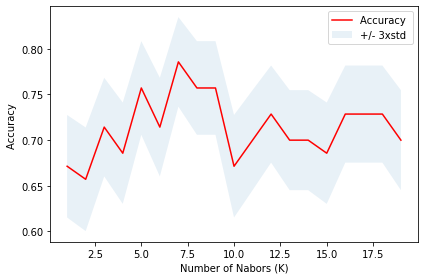

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7857142857142857 with k= 7


In [ ]:
#Decision Tree Classification Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=tree.predict(X_test)
Accuracy=metrics.accuracy_score(y_test,y_pred)
Accuracy

0.6142857142857143

In [ ]:
#Support Vector Machines
from sklearn import svm
model2=svm.SVC(kernel='rbf')
model2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = model2.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=uint8)

In [ ]:
print(metrics.accuracy_score(y_test,y_pred))


0.7428571428571429


In [ ]:
#logistic Regression Classification Algorithm

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
model3=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)


In [ ]:

y_pred=model3.predict(X_test)
print(y_pred)
print(model3.predict_proba(X_test))

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
[[0.5034238  0.4965762 ]
 [0.45206111 0.54793889]
 [0.30814132 0.69185868]
 [0.34259428 0.65740572]
 [0.32025894 0.67974106]
 [0.31680537 0.68319463]
 [0.48830185 0.51169815]
 [0.47823073 0.52176927]
 [0.34259428 0.65740572]
 [0.4934056  0.5065944 ]
 [0.33806706 0.66193294]
 [0.49662231 0.50337769]
 [0.24891907 0.75108093]
 [0.3419095  0.6580905 ]
 [0.43751789 0.56248211]
 [0.25760497 0.74239503]
 [0.52357188 0.47642812]
 [0.30450278 0.69549722]
 [0.50166363 0.49833637]
 [0.3195971  0.6804029 ]
 [0.44276988 0.55723012]
 [0.49410185 0.50589815]
 [0.51350333 0.48649667]
 [0.47203498 0.52796502]
 [0.40944694 0.59055306]
 [0.50846442 0.49153558]
 [0.51098415 0.48901585]
 [0.37457647 0.62542353]
 [0.50418423 0.49581577]
 [0.25299635 0.74700365]
 [0.46824113 0.53175887]
 [0.46024688 0.53975312]
 [0.46206917 0.53793083]
 [0.48402425 0.51597575]
 [0.388

In [ ]:
print(metrics.accuracy_score(y_test,y_pred))




0.6857142857142857


In [ ]:
#Model testing on the model_evaluation data set
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv


--2020-11-09 10:37:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-11-09 10:37:55 (660 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [ ]:
test_df['Gender'].replace(to_replace = ['male', 'female'], value = [0,1], inplace=True)

test_df['effective_date']=pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [ ]:
X_testset=Feature_test
y_testset=pd.get_dummies(test_df['loan_status'])['PAIDOFF'].values
y_testset

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
y_pred_knn=neigh.predict(X_testset)
y_pred_dt=tree.predict(X_testset)
y_pred_svm=model2.predict(X_testset)
y_pred_lr=model3.predict(X_testset)
y_pred_lr_proba=model3.predict_proba(X_testset)

In [ ]:
print(f1_score(y_testset,y_pred_knn))
print(f1_score(y_testset,y_pred_dt))
print(f1_score(y_testset,y_pred_svm))
print(f1_score(y_testset,y_pred_knn))

0.851063829787234
0.851063829787234
0.851063829787234
0.851063829787234


In [ ]:
LR_log_loss=log_loss(y_testset,y_pred_lr_proba)

print(LR_log_loss)
print(jaccard_similarity_score(y_testset,y_pred_knn))
print(jaccard_similarity_score(y_testset,y_pred_dt))
print(jaccard_similarity_score(y_testset,y_pred_svm))


23.10553276265266
0.7407407407407407
0.7407407407407407
0.7407407407407407


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
